In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


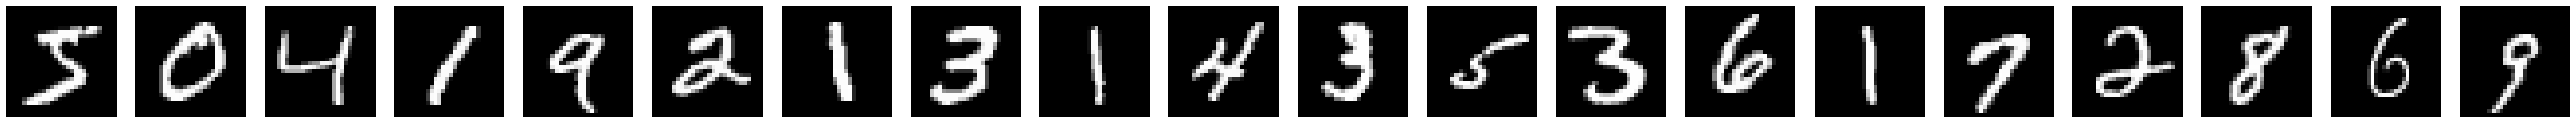

In [4]:
from matplotlib import pyplot as plt
num_images = 20 # Adjust this number as needed

fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))

for i in range(num_images):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Flatten the images from 28x28 to 784 features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
# y_train_flattened = y_train.reshape(X_train.shape[0], -1)
# y_test_flattened = y_test.reshape(X_test.shape[0], -1)

In [6]:
y_train.shape

(60000,)

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.DataFrame((X_train_flattened))

In [9]:
df['label'] = y_train

In [10]:
df['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [11]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [12]:
import seaborn as sns

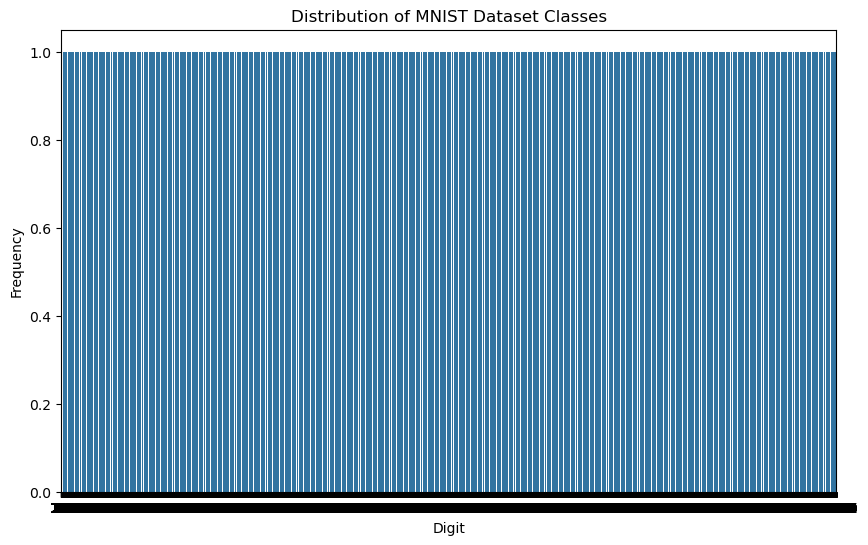

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(df['label'][:10])
plt.title('Distribution of MNIST Dataset Classes')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

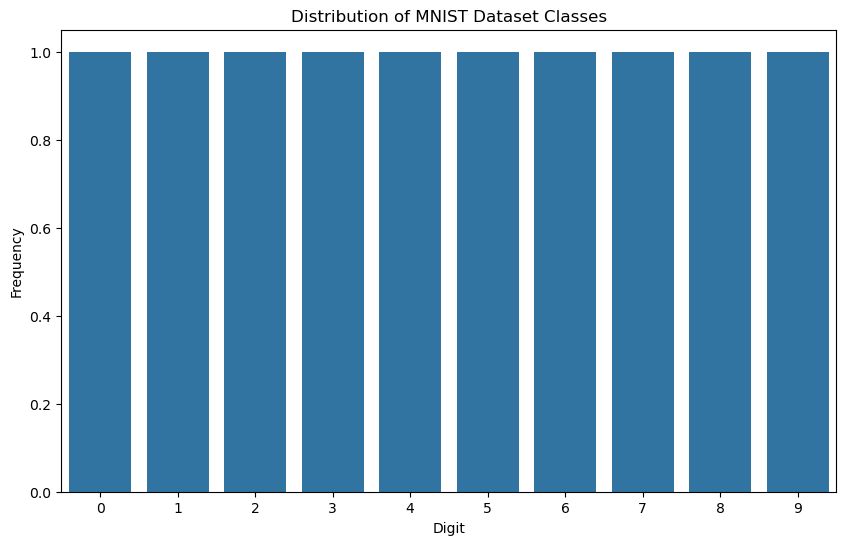

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(df['label'].unique())
plt.title('Distribution of MNIST Dataset Classes')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

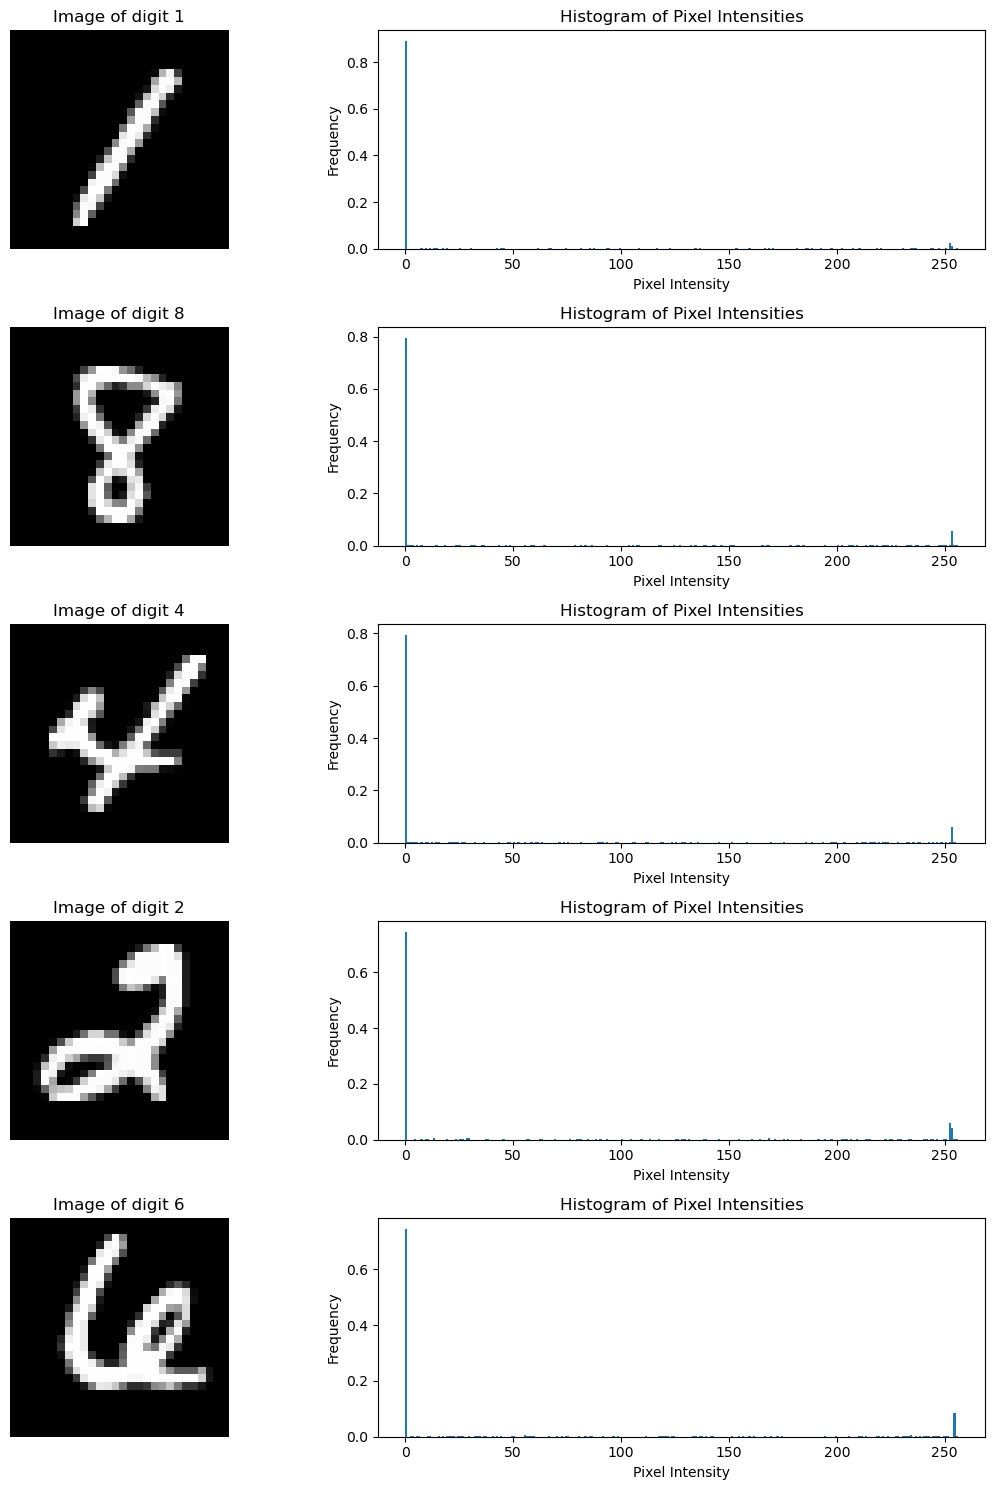

In [22]:
def plot_histogram(image, ax):
    ax.hist(image.ravel(), bins=256, range=(0, 256), density=True)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Pixel Intensities')

num_samples = 5 # Number of sample images to plot
sample_indices = np.random.choice(len(X_train), num_samples, replace=False)

# Plot the sample images and their histograms
fig, axes = plt.subplots(num_samples, 2, figsize=(12, 15))

for i, idx in enumerate(sample_indices):
    # Plot the sample image
    ax_img = axes[i, 0]
    ax_img.imshow(X_train[idx], cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(f'Image of digit {y_train[idx]}')

    # Plot the histogram
    ax_hist = axes[i, 1]
    plot_histogram(X_train[idx], ax_hist)

plt.tight_layout()
plt.show()

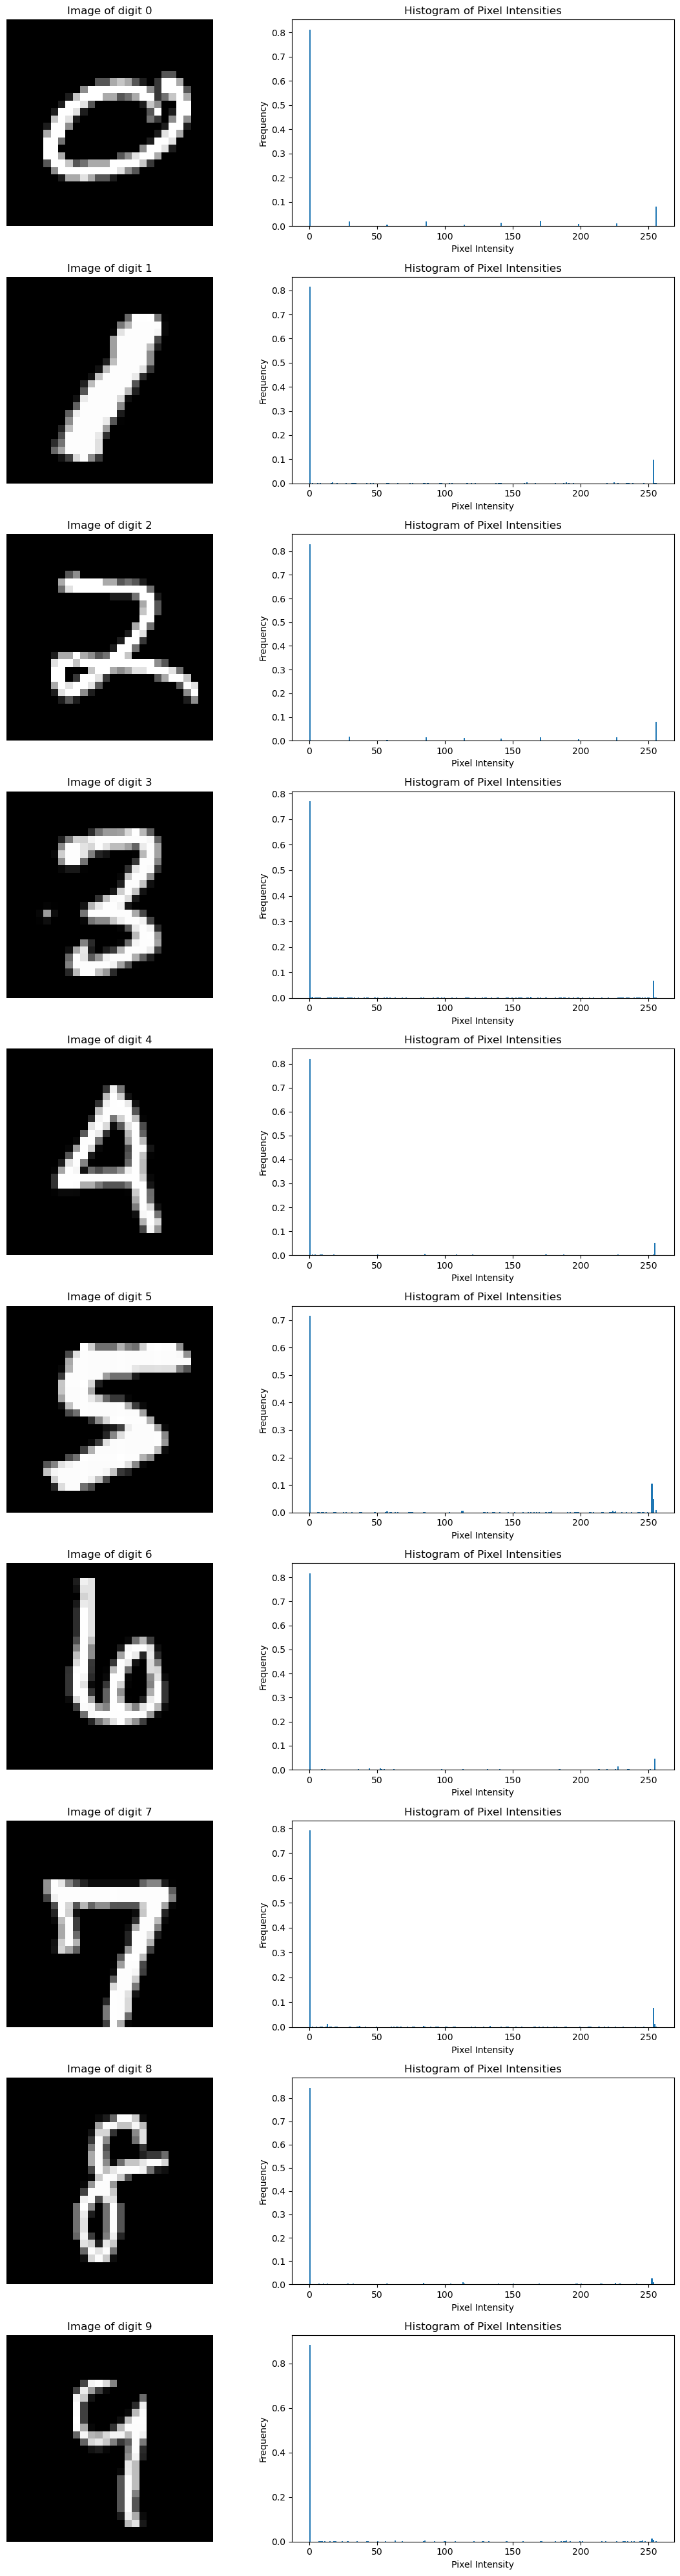

In [25]:

def plot_histogram(image, ax):
    ax.hist(image.ravel(), bins=256, range=(0, 256), density=True)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Pixel Intensities')

# Number of unique classes (digits)
num_classes = len(np.unique(y_train))

# Select one random sample for each unique class
unique_indices = []
for cls in range(num_classes):
    cls_indices = np.where(y_train == cls)[0]
    unique_idx = np.random.choice(cls_indices, 1)[0]
    unique_indices.append(unique_idx)

# Plot the sample images and their histograms
fig, axes = plt.subplots(num_classes, 2, figsize=(12, 4 * num_classes))

for i, idx in enumerate(unique_indices):
    # Plot the sample image
    ax_img = axes[i, 0]
    ax_img.imshow(X_train[idx], cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(f'Image of digit {y_train[idx]}')

    # Plot the histogram
    ax_hist = axes[i, 1]
    plot_histogram(X_train[idx], ax_hist)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [28]:
knn.fit(X_train_flattened, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test_flattened)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



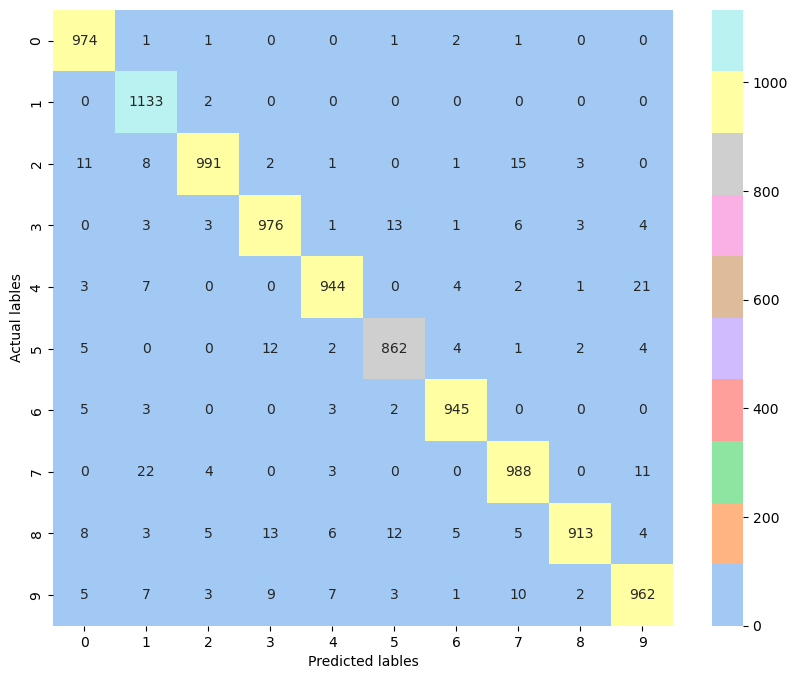

In [32]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('pastel'), fmt='.0f')
plt.xlabel('Predicted lables')
plt.ylabel('Actual lables')
plt.show()

In [49]:
np.random.seed(10)
random_weights = np.random.rand(784)

In [50]:
randomly_weighted_knn = KNeighborsClassifier(metric_params= {'w': random_weights})

In [51]:
randomly_weighted_knn

KNeighborsClassifier(metric_params={'w': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578,
       0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317,
       0.43401399, 0.61776698, 0.5131...
       0.48306052, 0.94970976, 0.54970372, 0.52442621, 0.87358481,
       0.64672582, 0.32923077, 0.01044932, 0.13709541, 0.77031791,
       0.83306662, 0.66467966, 0.5755562 , 0.90844811, 0.71437515,
       0.48190002, 0.70738989, 0.63937292, 0.02493945, 0.80307407,
       0.74634872, 0.38706935, 0.58632098, 0.23635684, 0.98863021,
       0.58878233, 0.19907788, 0.99016774, 0.85310139, 0.34412103,
       0.65704104, 0.93306039, 0.55907635, 0.61710508])})

In [52]:
randomly_weighted_knn.fit(X_train_flattened, y_train)

KNeighborsClassifier(metric_params={'w': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578,
       0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317,
       0.43401399, 0.61776698, 0.5131...
       0.48306052, 0.94970976, 0.54970372, 0.52442621, 0.87358481,
       0.64672582, 0.32923077, 0.01044932, 0.13709541, 0.77031791,
       0.83306662, 0.66467966, 0.5755562 , 0.90844811, 0.71437515,
       0.48190002, 0.70738989, 0.63937292, 0.02493945, 0.80307407,
       0.74634872, 0.38706935, 0.58632098, 0.23635684, 0.98863021,
       0.58878233, 0.19907788, 0.99016774, 0.85310139, 0.34412103,
       0.65704104, 0.93306039, 0.55907635, 0.61710508])})

In [53]:
y_pred = randomly_weighted_knn.predict(X_test_flattened)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



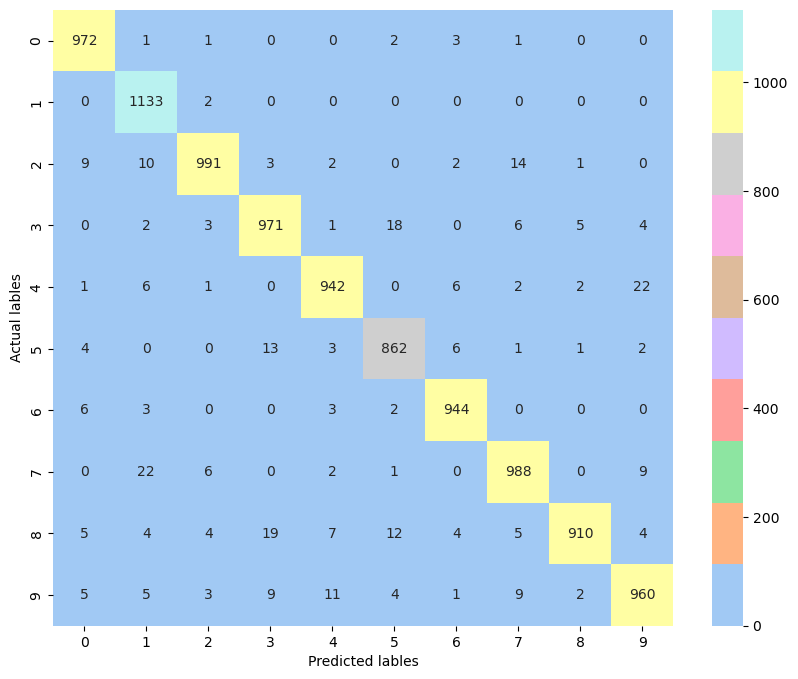

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('pastel'), fmt='.0f')
plt.xlabel('Predicted lables')
plt.ylabel('Actual lables')
plt.show()